In [5]:
!pwd
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/git/scikit-exercises/git

/content/drive/MyDrive/git/scikit-exercises
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/git/scikit-exercises/git


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train.shape

(891, 12)

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
del train['Cabin']
del test['Cabin']

In [58]:
train.fillna(train.mean(),inplace=True)
test.fillna(test.mean(),inplace=True)

<ipython-input-58-851ab5ba8b87>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.mean(),inplace=True)
<ipython-input-58-851ab5ba8b87>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.fillna(test.mean(),inplace=True)


In [59]:
le = preprocessing.LabelEncoder()
train["Embarked"]=le.fit_transform(train["Embarked"])
le = preprocessing.LabelEncoder()
train["Sex"]=le.fit_transform(train["Sex"])
le = preprocessing.LabelEncoder()
test["Embarked"]=le.fit_transform(test["Embarked"])
le = preprocessing.LabelEncoder()
test["Sex"]=le.fit_transform(test["Sex"])

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [61]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [62]:
train.groupby("Survived")["Sex"].value_counts()

Survived  Sex
0         1      468
          0       81
1         0      233
          1      109
Name: Sex, dtype: int64

In [63]:
del train['Name']
del train['Ticket']
del test['Name']
del test['Ticket']

<ipython-input-64-713ea09628f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(train.corr(), annot=True)


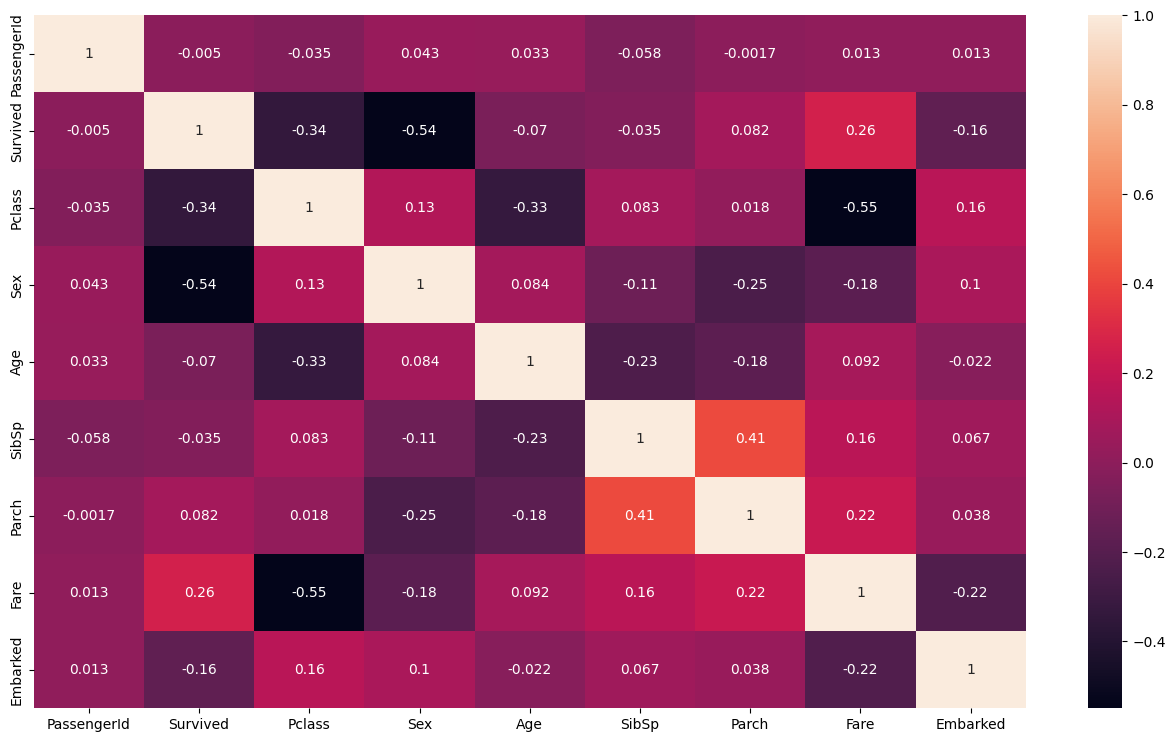

In [64]:
plt.figure(figsize=(16,9))
ax=sns.heatmap(train.corr(), annot=True)

In [65]:


x_train= train[["Pclass","Embarked","SibSp","Age","Sex","PassengerId"]]
y_train= train["Survived"]
x_test= test[["Pclass","Embarked","SibSp","Age","Sex","PassengerId"]]

x_train

,Pclass,Embarked,SibSp,Age,Sex,PassengerId
0,3,2,1,22.000000,1,1
1,1,0,1,38.000000,0,2
2,3,2,0,26.000000,0,3
3,1,2,1,35.000000,0,4
4,3,2,0,35.000000,1,5
...,...,...,...,...,...,...
886,2,2,0,27.000000,1,887
887,1,2,0,19.000000,0,888
888,3,2,1,29.699118,0,889
889,1,0,0,26.000000,1,890


In [66]:
clf = DecisionTreeClassifier(max_leaf_nodes=100, random_state=0)
clf.fit(x_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=100, random_state=0)

## score sur le training set

In [67]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_train)
accuracy_score(y_train, y_pred)

0.9405162738496072

In [68]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 199 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 4] <= 0.5 else to node 2.
	node=1 is a split node: go to node 3 if X[:, 0] <= 2.5 else to node 4.
	node=2 is a split node: go to node 5 if X[:, 3] <= 6.5 else to node 6.
		node=3 is a split node: go to node 95 if X[:, 3] <= 2.5 else to node 96.
		node=4 is a split node: go to node 11 if X[:, 1] <= 1.5 else to node 12.
		node=5 is a split node: go to node 9 if X[:, 2] <= 2.5 else to node 10.
		node=6 is a split node: go to node 7 if X[:, 0] <= 1.5 else to node 8.
			node=7 is a split node: go to node 15 if X[:, 5] <= 565.5 else to node 16.
			node=8 is a split node: go to node 49 if X[:, 3] <= 13.0 else to node 50.
			node=9 is a leaf node.
			node=10 is a leaf node.
			node=11 is a split node: go to node 13 if X[:, 3] <= 30.09955883026123 else to node 14.
			node=12 is a split node: go to node 19 if X[:, 2] <= 1.5 else to node 20.
				node=13 is a split node: go t

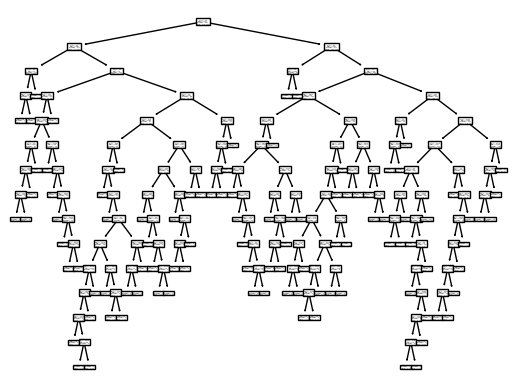

In [69]:
tree.plot_tree(clf)
plt.show()

séparer le train set en 2 : 2/3, 1/3

utilsez le 1er pour entrainer , le deuxieme pour prédire
ajuster la profondeur de l'arbre

égaler le score sur kaggle https://www.kaggle.com/competitions/titanic


https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook 


In [70]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=2)
X_train.shape, Y_train.shape

((712, 6), (712,))

In [71]:
X_train

,Pclass,Embarked,SibSp,Age,Sex,PassengerId
30,1,0,0,40.000000,1,31
10,3,2,1,4.000000,0,11
873,3,2,0,47.000000,1,874
182,3,2,4,9.000000,1,183
876,3,2,0,20.000000,1,877
...,...,...,...,...,...,...
534,3,2,0,30.000000,0,535
584,3,0,0,29.699118,1,585
493,1,0,0,71.000000,1,494
527,1,2,0,29.699118,1,528


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
<ipython-input-72-6db2155e8189>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The k

Train/Test split results:
LogisticRegression accuracy is 0.777
LogisticRegression log_loss is 0.514
LogisticRegression auc is 0.828


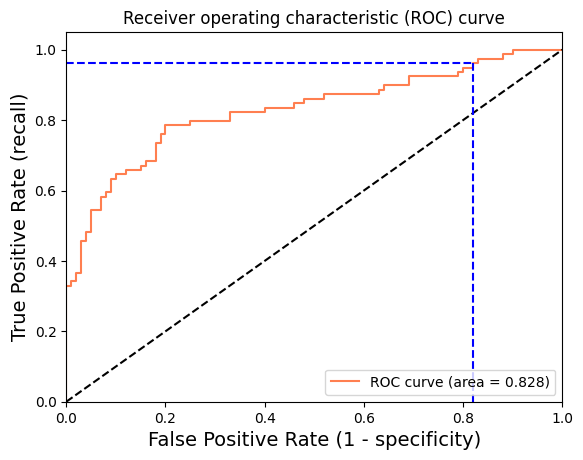

Using a threshold of 0.066 guarantees a sensitivity of 0.962 and a specificity of 0.180, i.e. a false positive rate of 82.00%.


In [72]:

# check classification scores of logistic regression
logreg = LogisticRegression(C=1.0)
logreg.fit(np.asarray(X_train).astype(np.float64), np.asarray(Y_train).astype(np.float64))
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))